## 0.Veri Setinin Hazırlanması

In [184]:
#Kullanacağımız kütüphaneleri yükledik.

import numpy as np
import pandas as pd


# Görselleştirme kütüphanesi
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
# Dataset'e giden yolu belirttik.

df_ = pd.read_csv("/kaggle/input/black-friday-sale/train.csv")
df = df_.copy()

In [186]:
# Veri setinde rasgele eksik veriler oluşturalım.

import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1.Veriye İlk Bakış 

In [187]:
#Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001.0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001.0,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,NaN,15200.0
2,1000001.0,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001.0,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002.0,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [188]:
#Veri çerçevesinin son 3 gözlemini görüntüleyelim.

df.tail(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550065,1006036.0,P00375436,F,26-35,15.0,B,4+,1.0,20.0,NaN,NaN,137.0
550066,1006038.0,P00375436,NaN,55+,1.0,C,2,0.0,20.0,NaN,NaN,365.0
550067,1006039.0,P00371644,F,46-50,0.0,B,4+,1.0,20.0,NaN,NaN,490.0


In [189]:
#Veri çerçevesinin  kaç öznitelik ve kaç gözlemden oluştuğunu görüntülyelim.

df.shape

(550068, 12)

In [190]:
# Veri setindeki kolonları görüntüleyelim.

print(list(df.columns), '\n')

# Toplam kaç adet kolonumuz olduğunu görüntüleyelim.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Fonksiyonun bize hangi tipte veri döndürdüğünü görüntüleyelim.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'] 

Veri seti içerisinde toplam 12 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [191]:
# Veri çerçevesindeki değişkelerin hangi tipte olduğunu ve bellek kullanımı görüntüleyeleim.

df.info

<bound method DataFrame.info of           User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001.0  P00069042      F   0-17        10.0             A   
1       1000001.0  P00248942      F   0-17        10.0             A   
2       1000001.0  P00087842      F   0-17        10.0             A   
3       1000001.0  P00085442      F   0-17        10.0             A   
4       1000002.0  P00285442      M    55+        16.0             C   
...           ...        ...    ...    ...         ...           ...   
550063  1006033.0  P00372445      M  51-55        13.0             B   
550064  1006035.0  P00375436      F  26-35         1.0             C   
550065  1006036.0  P00375436      F  26-35        15.0             B   
550066  1006038.0  P00375436    NaN    55+         1.0             C   
550067  1006039.0  P00371644      F  46-50         0.0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                             

In [192]:
# Her kolonun veri tipini görüntüleyelim.

df.dtypes

User_ID                       float64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [193]:
# Bellek ve işlem süresinden tasarruf sağlamak, analizlerin daha anlamlı ve doğru olmasını kolaylaştırmak ve verinin yanlış hesaplanma riskini ortadan kaldırmak için kategorik değişken olarak tanımladık. 

categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [194]:
# Oluşturduğumuz listeleri görüntüleyelim.

categorical_features, numerical_features

(['Product_ID',
  'Gender',
  'Age',
  'City_Category',
  'Stay_In_Current_City_Years'],
 ['User_ID',
  'Occupation',
  'Marital_Status',
  'Product_Category_1',
  'Product_Category_2',
  'Product_Category_3',
  'Purchase'])

In [195]:
# Veri çerçevesindeki  sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.
# Standart sapma ve ortalama değerlerlerinden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.
# Varyans : Standart sapmanın karesi ve birimsiz halidir.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,533938.0,1.003029e+06,1727.494034,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Occupation,533749.0,8.076671e+00,6.523459,0.0,2.0,7.0,14.0,20.0
Marital_Status,533901.0,4.097464e-01,0.491787,0.0,0.0,0.0,1.0,1.0
Product_Category_1,533791.0,5.404677e+00,3.936572,1.0,1.0,5.0,8.0,20.0
Product_Category_2,365314.0,9.842119e+00,5.086150,2.0,5.0,9.0,15.0,18.0
Product_Category_3,161816.0,1.266678e+01,4.126041,3.0,9.0,14.0,16.0,18.0
Purchase,533774.0,9.262732e+03,5023.041426,12.0,5822.0,8046.0,12052.0,23961.0


## 2.Eksik Veri Analizi


Eksik veri analizi, veri setindeki eksik değerlerin tespit edilip uygun yöntemlerle düzeltilmesini amaçlar. Veri setinde eksik değerlerin bulunması, yapısal bir bozukluğa işaret edebilir ve bu durum dikkatle ele alınmalıdır. Eksik verilerin ortaya çıkma sebepleri titizlikle incelenmeli ve bu analiz sonucu, eksik verilerin nasıl işleneceği konusunda doğru bir yaklaşım benimsenmelidir.

## 2.1 Eksik Veirlerin Gözlemlenmesi

In [196]:
# Veri setinde kaç adet eksik değer olduğunu gözlemleyelim.

df.isna().sum()

User_ID                        16130
Product_ID                     16425
Gender                         16236
Age                            16210
Occupation                     16319
City_Category                  16199
Stay_In_Current_City_Years     16449
Marital_Status                 16167
Product_Category_1             16277
Product_Category_2            184754
Product_Category_3            388252
Purchase                       16294
dtype: int64

In [197]:
# Veri setinde toplam kaç adet eksik değer olduğunu gözlemleyelim.

df.isna().sum().sum()

735712

In [198]:
# Veri setindeki eksik olmayan değerleri görüntüleyelim.
df.notnull().sum()

User_ID                       533938
Product_ID                    533643
Gender                        533832
Age                           533858
Occupation                    533749
City_Category                 533869
Stay_In_Current_City_Years    533619
Marital_Status                533901
Product_Category_1            533791
Product_Category_2            365314
Product_Category_3            161816
Purchase                      533774
dtype: int64

In [199]:
# Toplamda veri setindeki eksik gözlemleri ve eksik olmayan gözlemleri görüntüleyelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 5865104 adet eksik olmayan, 735712 eksik gözlem var.


In [200]:
# Veri setinde en az bir gözlemi eksik olan kayıtları görünteleyelim.
df[df.isnull().any(axis = 1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001.0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001.0,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,NaN,15200.0
2,1000001.0,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001.0,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002.0,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033.0,P00372445,M,51-55,13.0,B,1,1.0,20.0,NaN,NaN,368.0
550064,1006035.0,P00375436,F,26-35,1.0,C,NaN,0.0,20.0,NaN,NaN,371.0
550065,1006036.0,P00375436,F,26-35,15.0,B,4+,1.0,20.0,NaN,NaN,137.0
550066,1006038.0,P00375436,NaN,55+,1.0,C,2,0.0,20.0,NaN,NaN,365.0


In [201]:
# Eksik gözlemi bulunmayan kayıtları görüntüleyelim.
df[df.notnull().all(axis = 1)][:5]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
13,1000005.0,P00145042,M,26-35,20.0,A,1,1.0,1.0,2.0,5.0,15665.0
14,1000006.0,P00231342,F,51-55,9.0,A,1,0.0,5.0,8.0,14.0,5378.0
16,1000006.0,P0096642,F,51-55,9.0,A,1,0.0,2.0,3.0,4.0,13055.0
18,1000007.0,P00036842,M,36-45,1.0,B,1,1.0,1.0,14.0,16.0,11788.0
19,1000008.0,P00249542,M,26-35,12.0,C,4+,1.0,1.0,5.0,15.0,19614.0


In [202]:
# Eksik veri oranlarını hesaplayalım.

missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


User_ID                        2.932365
Product_ID                     2.985994
Gender                         2.951635
Age                            2.946908
Occupation                     2.966724
City_Category                  2.944909
Stay_In_Current_City_Years     2.990358
Marital_Status                 2.939091
Product_Category_1             2.959089
Product_Category_2            33.587484
Product_Category_3            70.582546
Purchase                       2.962179
dtype: float64


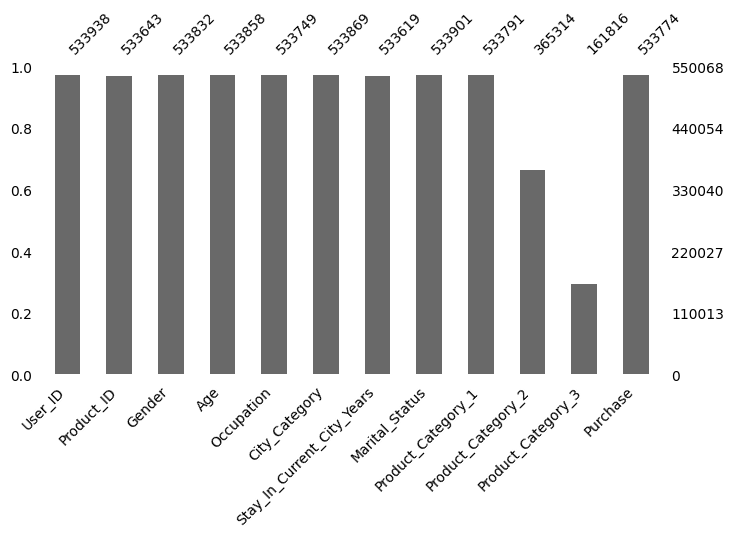

In [203]:
 # Herbir kolonun totalde kaç adet eksik olmayan gözlemi var görsel olarak inceleyelim.

import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

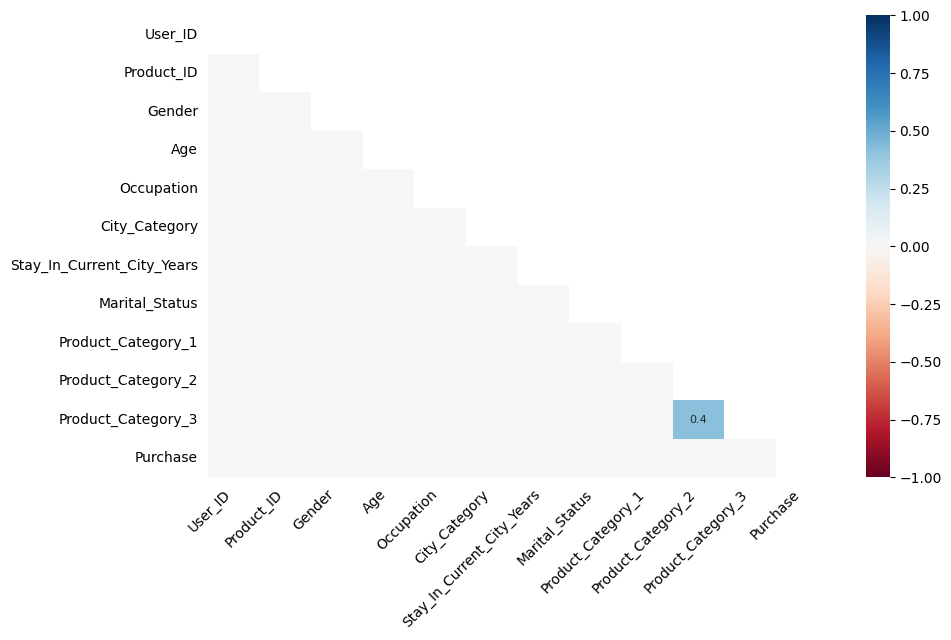

In [204]:
# Kolonlar arasıdaki eksik verilerin ilişkisini görselleştirerek heatmapte inceleyelim.
# Nullity Correlation (Heatmap)
# Değer 1'e ne kadar yakınsa eksik değerlerin birbirleriyle ilişkili ihtimali o kadar yükselir.

msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

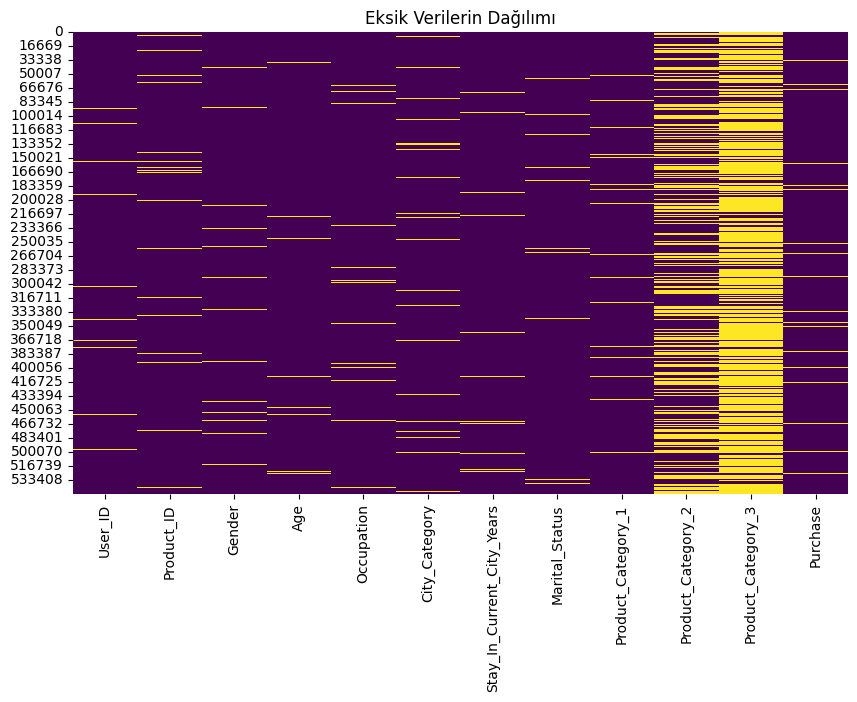

In [205]:
 # Eksik değerlerin dağılımını anlamak amacıyla görsel olarak inceleyelim.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Verilerin Dağılımı")
plt.show()

In [206]:

# Eksik veri oranlarını tablo şeklide gösterelim.Bu şekilde eksik veri oranlarından yola çıkarak eksik verlerilerle nasıl ilerleyeceğimize karar verebilriz.

import pandas as pd

# Verilerinizi içeren DataFrame 'df' olduğu varsayılıyor

# Eksik veri oranlarını hesaplayalım
missing_data = df.isna().mean() * 100

# Gruplama fonksiyonu
def categorize_missing_data(rate):
    if rate < 5:
        return "Düşük oran"
    elif 5 <= rate < 35:
        return "Yüksek oran"
    else:
        return "Çok yüksek oran"

# Yeni DataFrame oluşturalım
missing_data_summary = pd.DataFrame({
    'Sütun Adı': missing_data.index,
    'Eksik Veri Oranı (%)': missing_data.values,
})

# Eksik veri oranına göre gruplama ekleyelim
missing_data_summary['Gruplama'] = missing_data_summary['Eksik Veri Oranı (%)'].apply(categorize_missing_data)

# Sonuçları görüntüleyelim
print(missing_data_summary)


                     Sütun Adı  Eksik Veri Oranı (%)         Gruplama
0                      User_ID              2.932365       Düşük oran
1                   Product_ID              2.985994       Düşük oran
2                       Gender              2.951635       Düşük oran
3                          Age              2.946908       Düşük oran
4                   Occupation              2.966724       Düşük oran
5                City_Category              2.944909       Düşük oran
6   Stay_In_Current_City_Years              2.990358       Düşük oran
7               Marital_Status              2.939091       Düşük oran
8           Product_Category_1              2.959089       Düşük oran
9           Product_Category_2             33.587484      Yüksek oran
10          Product_Category_3             70.582546  Çok yüksek oran
11                    Purchase              2.962179       Düşük oran


Bu yaptığımız görselleştirmeler bize hangi veri ne kadar eksik, eksik değerlerin dağılımı nasıl ilerliyor ve bu eksik verilere karşı bizim nasıl ilerlememez gerektiğini analiz ediyor ve bu konuyla alakalı fikir veriyor.

## 2.2 Eksik Verilerin Silinmesi

In [207]:
# Bu sütun tamamen eksik olduğundan ve hepsinin doldurulması durumunda analizlerde yanıltıcı olabileceğinden tamamen kaldırdım.
df.drop(['Product_Category_3'], axis=1, inplace=True)

## 2.3 Eksik Verilerin Doldurulması

 Eksik veriler, ortalama, medyan, mod gibi istatistiksel yöntemlerle; sabit bir değer atanarak; önceki veya sonraki geçerli değerlerle (forward/backward fill); ya da KNN, regresyon gibi tahmin yöntemleriyle doldurulabilir.Kullanılacak yöntem, veri setinin yapısına ve problemin doğasına göre dikkatle seçilmelidir.

## 2.3.1 Sayısal Değişkenlerin Median Doldurulması

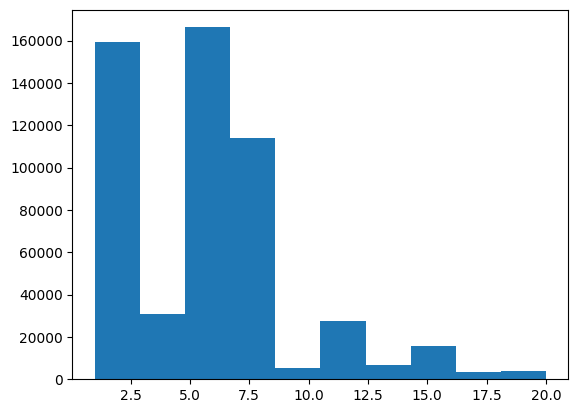

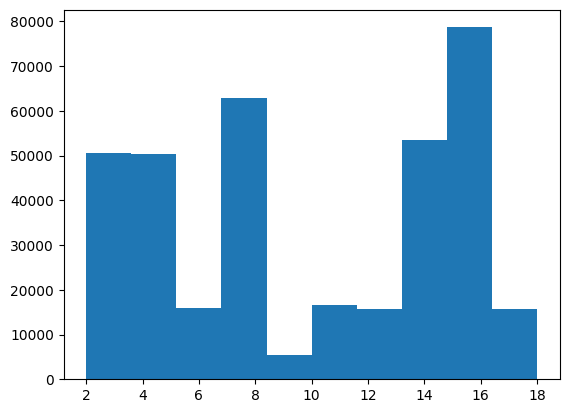

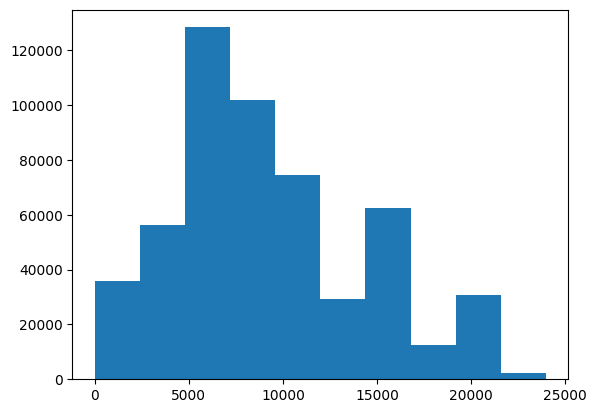

In [208]:
# Sayısal değişkenin dağılımını görmek ve doldururken hangi yötemle ilerleyeceğimizi seçmek için histogram kullanabiliriz.
plt.hist(df['Product_Category_1'])
plt.show()

plt.hist(df['Product_Category_2'])
plt.show()

plt.hist(df['Purchase'])
plt.show()

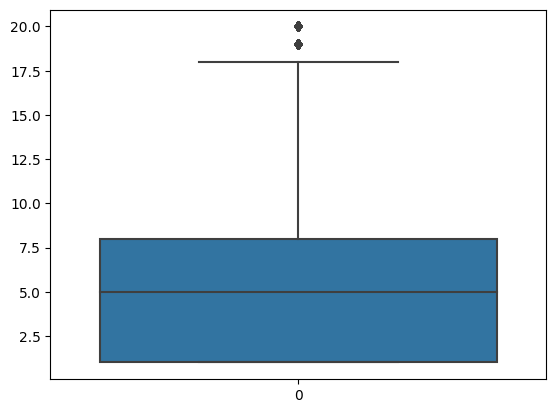

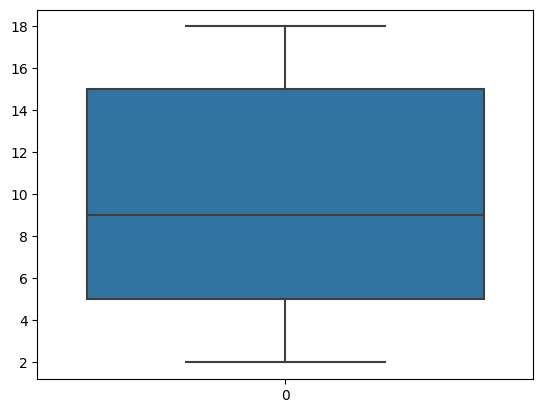

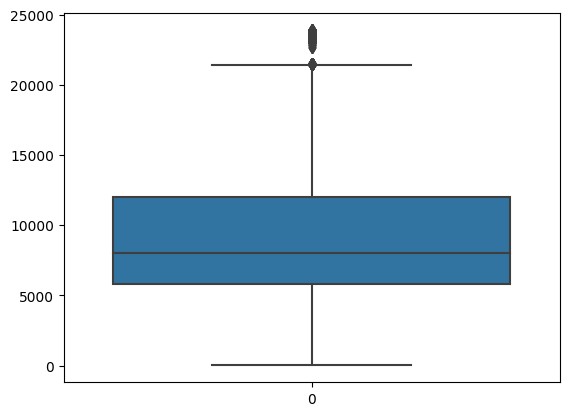

In [209]:
# Uç değerleri kontrol edelim.

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Product_Category_1'])
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Product_Category_2'])
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Purchase'])
plt.show()



In [210]:
df['Product_Category_1'].fillna(df['Product_Category_1'].median(), inplace=True)

df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace=True)

df['Purchase'].fillna(df['Purchase'].median(), inplace=True)

/tmp/ipykernel_30/3139767787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_1'].fillna(df['Product_Category_1'].median(), inplace=True)
/tmp/ipykernel_30/3139767787.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [211]:
# 'Product_Category_1' sütunundaki ilk birkaç değeri görelim.
print(df['Product_Category_1'].head())

# Verinin tümünü görmek istersek:
print(df['Product_Category_1'])


0     3.0
1     1.0
2    12.0
3    12.0
4     8.0
Name: Product_Category_1, dtype: float64
0          3.0
1          1.0
2         12.0
3         12.0
4          8.0
          ... 
550063    20.0
550064    20.0
550065    20.0
550066    20.0
550067    20.0
Name: Product_Category_1, Length: 550068, dtype: float64


In [212]:
# 'Product_Category_2' sütunundaki ilk birkaç değeri görelim.
print(df['Product_Category_2'].head())

# Verinin tümünü görmek istersek:
print(df['Product_Category_2'])


0     9.0
1     6.0
2     9.0
3    14.0
4     9.0
Name: Product_Category_2, dtype: float64
0          9.0
1          6.0
2          9.0
3         14.0
4          9.0
          ... 
550063     9.0
550064     9.0
550065     9.0
550066     9.0
550067     9.0
Name: Product_Category_2, Length: 550068, dtype: float64


In [213]:
# 'Purchase' sütunundaki ilk birkaç değeri görelim.
print(df['Purchase'].head())

# Verinin tümünü görmek istersek:
print(df['Purchase'])


0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64
0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64


In [214]:
# Her bir sütundaki eksik değerlerin sayısını görüntüleyelim.
print(df.isnull().sum())

# Her bir sütundaki eksik değer oranını görüntüleyelim.
print(df.isnull().mean() * 100)


User_ID                       16130
Product_ID                    16425
Gender                        16236
Age                           16210
Occupation                    16319
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64
User_ID                       2.932365
Product_ID                    2.985994
Gender                        2.951635
Age                           2.946908
Occupation                    2.966724
City_Category                 2.944909
Stay_In_Current_City_Years    2.990358
Marital_Status                2.939091
Product_Category_1            0.000000
Product_Category_2            0.000000
Purchase                      0.000000
dtype: float64


In [215]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,533938.0,1.003029e+06,1727.494034,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Occupation,533749.0,8.076671e+00,6.523459,0.0,2.0,7.0,14.0,20.0
Marital_Status,533901.0,4.097464e-01,0.491787,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.392702e+00,3.878498,1.0,2.0,5.0,8.0,20.0
Product_Category_2,550068.0,9.559273e+00,4.163937,2.0,8.0,9.0,14.0,18.0
Purchase,550068.0,9.226690e+03,4952.384498,12.0,5881.0,8046.0,11977.0,23961.0


## 2.3.2 Kategorik Değişkenlerin Mode ile Doldurulması

In [216]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturalım.
df_fillna = df.copy()

df_fillna.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001.0,P00069042,F,0-17,10.0,A,2,0.0,3.0,9.0,8370.0
1,1000001.0,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,15200.0
2,1000001.0,P00087842,F,0-17,10.0,A,2,0.0,12.0,9.0,1422.0
3,1000001.0,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,1057.0
4,1000002.0,P00285442,M,55+,16.0,C,4+,0.0,8.0,9.0,7969.0


User_ID sayısal kimlik numaralarıdır, ancak analizlerde genelde sayısal gibi davranmaz. Occupation, meslek kodları sayısal olarak verilebilir, ancak bu kodların sınıf (kategori) ifade ettiğini unutmamak gerekir.

In [217]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# Meslekleri temsil eden sayılar içeriyor. Ancak sayılar arasında sıralama veya matematiksel anlam taşımıyor.

# User_ID değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['User_ID'].isna().sum()

# User_ID değişkende en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['User_ID'].mode()

# User_ID değişkenini mode değeri ile dolduralım.
df_fillna['User_ID'] = df_fillna['User_ID'].fillna(value = work_setting_mode[0])

# User_ID değişkenindeki toplam kaç adet eksik değer olduğunu tekrar görüntüleyelim.
df_fillna.isna().sum()

User_ID                           0
Product_ID                    16425
Gender                        16236
Age                           16210
Occupation                    16319
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [218]:
# Occupation her bir kullanıcıyı temsil eden benzersiz bir kimliktir. Sayılar arasında herhangi bir ilişkisel veya matematiksel anlam bulunmaz.

# Occupation değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Occupation'].isna().sum()

# Occupation değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Occupation'].mode()

# Occupation değişkenini mode değeri ile dolduralım.
df_fillna['Occupation'] = df_fillna['Occupation'].fillna(value = work_setting_mode[0])

# Occupation değişkenindeki toplam kaç adet eksik değer olduğunu tekrar görüntüleyelim.
df_fillna.isna().sum()

User_ID                           0
Product_ID                    16425
Gender                        16236
Age                           16210
Occupation                        0
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [219]:
# Product_ID değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Product_ID'].isna().sum()

# Product_ID değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Product_ID'].mode()

# Product_ID değişkenini mode değeri ile dolduralım.
df_fillna['Product_ID'] = df_fillna['Product_ID'].fillna(value = work_setting_mode[0])

# Product_ID değişkeninde toplam kaç adet eksik değer olduğunu tekrar görüntüleyelim.
df_fillna.isna().sum()

User_ID                           0
Product_ID                        0
Gender                        16236
Age                           16210
Occupation                        0
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                16167
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [220]:

# Marital_Status değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Marital_Status'].isna().sum()

# Marital_Status değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Marital_Status'].mode()

# Marital_Status değişkenini mode değeri ile dolduralım.
df_fillna['Marital_Status'] = df_fillna['Marital_Status'].fillna(value = work_setting_mode[0])

# Marital_Status değişkeninde toplam kaç adet eksik değer olduğunu tekrar görüntüleyelim.
df_fillna.isna().sum()


User_ID                           0
Product_ID                        0
Gender                        16236
Age                           16210
Occupation                        0
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [221]:

# Gender değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Gender'].isna().sum()

# Gender değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Gender'].mode()

# Gender değişkenini mode değeri ile dolduralım.
df_fillna['Gender'] = df_fillna['Gender'].fillna(value = work_setting_mode[0])

# Gender değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                           16210
Occupation                        0
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [222]:

# Age değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Age'].isna().sum()

# Age değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Age'].mode()

# Age değişkenini mode değeri ile dolduralım.
df_fillna['Age'] = df_fillna['Age'].fillna(value = work_setting_mode[0])

# Age değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                 16199
Stay_In_Current_City_Years    16449
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [223]:

# City_Category  değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['City_Category'].isna().sum()

# City_Category değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['City_Category'].mode()

# City_Category değişkenini mode değeri ile dolduralım.
df_fillna['City_Category'] = df_fillna['City_Category'].fillna(value = work_setting_mode[0])

# City_Category değişkeninde toplam kaç adet eksik değer olduğunu tekrar görüntüleyelim.
df_fillna.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years    16449
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Purchase                          0
dtype: int64

In [224]:
# Stay_In_Current_City_Years değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['Stay_In_Current_City_Years'].isna().sum()

# Stay_In_Current_City_Years değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Stay_In_Current_City_Years'].mode()

# Stay_In_Current_City_Years değişkenini mode değeri ile dolduralım.
df_fillna['Stay_In_Current_City_Years'] = df_fillna['Stay_In_Current_City_Years'].fillna(value = work_setting_mode[0])

# Stay_In_Current_City_Years değişkeninde toplam kaç adet eksik değer olduğunu tekrar görüntüleyelim.
df_fillna.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

## 3. Kategorik Değişken Analizi

In [225]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [226]:

# Kategorik değişkenleri belirleyelim.
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Kategorik Değişkenler:", categorical_columns)

Kategorik Değişkenler: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [227]:
#'Product_ID' ve 'Age' değişkenlerinin kategorik olduğunu varsayalım:
categorical_columns = ['User_ID', 'Occupation']

# Bu sütunları kategorik olarak değiştiriyoruz:
df[categorical_columns] = df[categorical_columns].astype('category')

# Veri tiplerini kontrol edelim
print(df.dtypes)


User_ID                       category
Product_ID                      object
Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object


In [228]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2


* Herbir kategorideki benzersiz değişkenleri tek tek görüntüleyelim.

In [229]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemleyelim.
df_categorical["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [230]:
df_categorical["Gender"].unique()

array(['F', 'M'], dtype=object)

In [231]:
df_categorical["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [232]:
df_categorical["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [233]:
df_categorical["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [234]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görüntüleyelim.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 3631 unique values in "Product_ID" categorical feature.

There are 2 unique values in "Gender" categorical feature.

There are 7 unique values in "Age" categorical feature.

There are 3 unique values in "City_Category" categorical feature.

There are 5 unique values in "Stay_In_Current_City_Years" categorical feature.



In [235]:
# Sınıf dağılımlarını inceleme
for col in categorical_columns:
    print(f"\n{col} Sınıf Dağılımları:")
    print(df[col].value_counts().head(10))  # İlk 10 sınıfı göster


User_ID Sınıf Dağılımları:
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: count, dtype: int64

Occupation Sınıf Dağılımları:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
Name: count, dtype: int64


In [236]:
# Kategorik değişkenlerin satış miktarıyla olan ilişkisini gruplandıralım.

for col in categorical_columns:
    if col != 'Purchase': 
        summary = df.groupby(col)['Purchase'].mean().sort_values(ascending=False).reset_index()
        print(f"\n{col} ve Satış Miktarı Ortalamaları:\n")
        print(summary)



User_ID ve Satış Miktarı Ortalamaları:

      User_ID      Purchase
0     1003902  18577.893617
1     1005069  18490.166667
2     1005999  18345.944444
3     1001349  18162.739130
4     1003461  17508.700000
...       ...           ...
5886  1004636   3612.812500
5887  1005944   3599.733333
5888  1002744   3421.521739
5889  1003598   2698.357143
5890  1004486   2318.733333

[5891 rows x 2 columns]

Occupation ve Satış Miktarı Ortalamaları:

   Occupation     Purchase
0          17  9821.478236
1          12  9796.640239
2          15  9778.891163
3           8  9532.592497
4          14  9500.702772
5           7  9425.728223
6          16  9394.464349
7           5  9333.149298
8          13  9306.351061
9           6  9256.535691
10          4  9213.980251
11         11  9213.845848
12          3  9178.593088
13         18  9169.655844
14          0  9124.428588
15         10  8959.355375
16          1  8953.193270
17          2  8952.481683
18         20  8836.494905
19         19 

/tmp/ipykernel_30/1717236070.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(col)['Purchase'].mean().sort_values(ascending=False).reset_index()
/tmp/ipykernel_30/1717236070.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(col)['Purchase'].mean().sort_values(ascending=False).reset_index()


## 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri


* Demografik Analizler :Bu analiz, yaş, cinsiyet, gelir düzeyi, eğitim durumu, meslek, medeni durum ve coğrafi konum gibi demografik faktörleri ele alır. Amaç, bir topluluğun yapısını anlamak ve bu yapıdan yola çıkarak stratejik kararlar almaktır. Pazarlama, sosyal araştırmalar ve kamu politikası gibi alanlarda sıkça kullanılır.

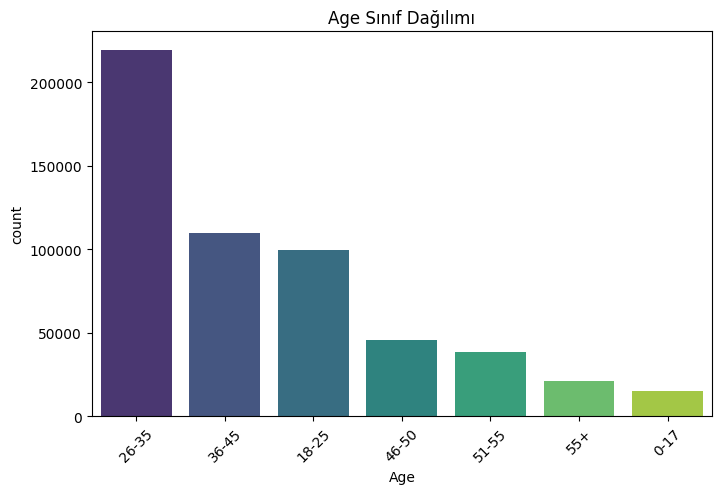

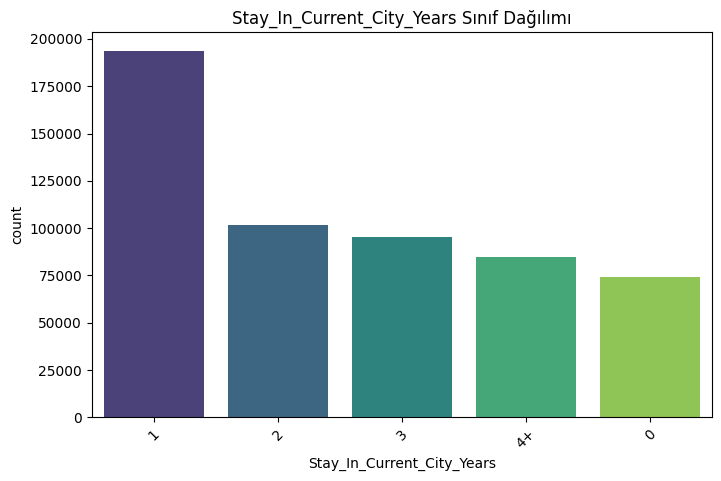

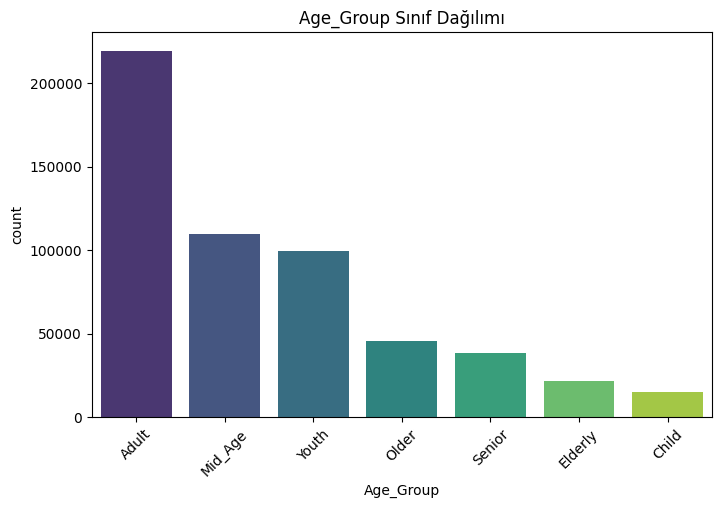

In [259]:
# Kategorik sütunları dinamik olarak belirleyelim
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Görselleştirme
for col in categorical_columns:
    if df[col].nunique() < 20:  # Çok sınıflı kategoriler filtrelendi
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
        plt.title(f"{col} Sınıf Dağılımı")
        plt.xticks(rotation=45)
        plt.show()


### Kategorik Değişkenlerin Satış Miktarıyla İlişkisini İnceleyelim

Çubuk grafik (Bar Chart): Kategorik verilerin görselleştirilmesi için kullanılan bir grafik türüdür. Her kategori, bir çubuk ile temsil edilir ve çubuğun uzunluğu veya yüksekliği, bu kategoriyle ilişkili bir değeri gösterir.
Anlaşılır ve kolay Yorumlanabilmesi diğer kategorilerle daha kolay kıyaslanmasından kaynaklı ilk etapta çubuk grafikle göstermek istedim.

/tmp/ipykernel_30/1064854178.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Purchase', data=df, ci=None, estimator=np.mean)  # Ortalama satış
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


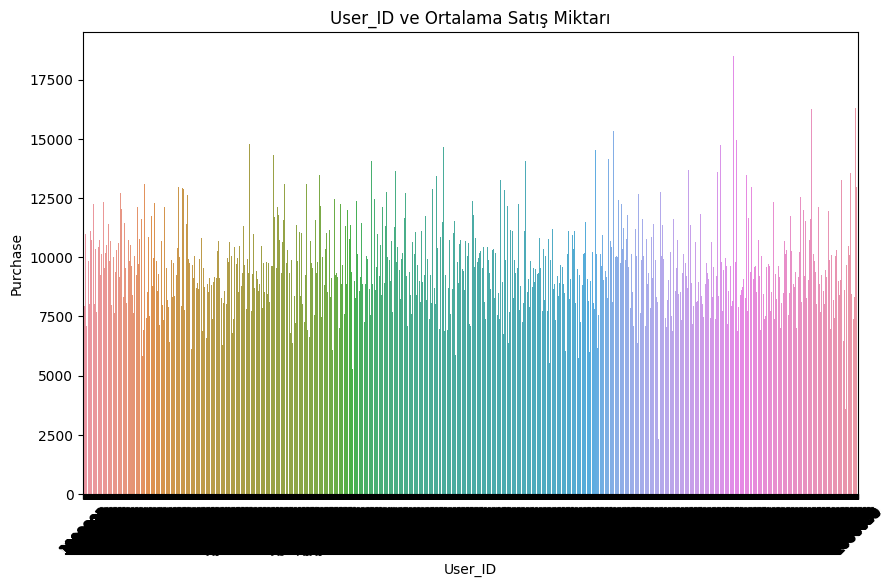

/tmp/ipykernel_30/1064854178.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Purchase', data=df, ci=None, estimator=np.mean)  # Ortalama satış
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


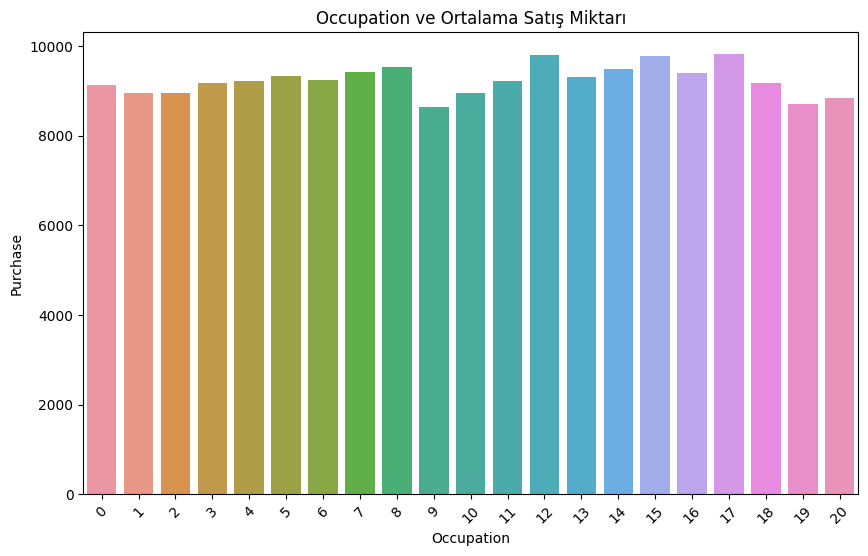

In [238]:
# Çubuk grafikle ortalama satış miktarını görselleştirerek inceleyelim.

for col in categorical_columns:
    if col != 'Purchase': 
        plt.figure(figsize=(10, 6))
        sns.barplot(x=col, y='Purchase', data=df, ci=None, estimator=np.mean)  # Ortalama satış
        plt.title(f'{col} ve Ortalama Satış Miktarı')
        plt.xticks(rotation=45)
        plt.show()


* Boxplot, sürekli bir değişkenin (örnekte 'Purchase') dağılımını ve bu değişkenin kategorik bir değişkenle (col) ilişkisini görselleştirmek için kullanılan bir grafik türüdür. Verideki merkezi eğilimi (medyan), yayılmayı (interquartile range - IQR) ve aykırı değerleri görselleştirir.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


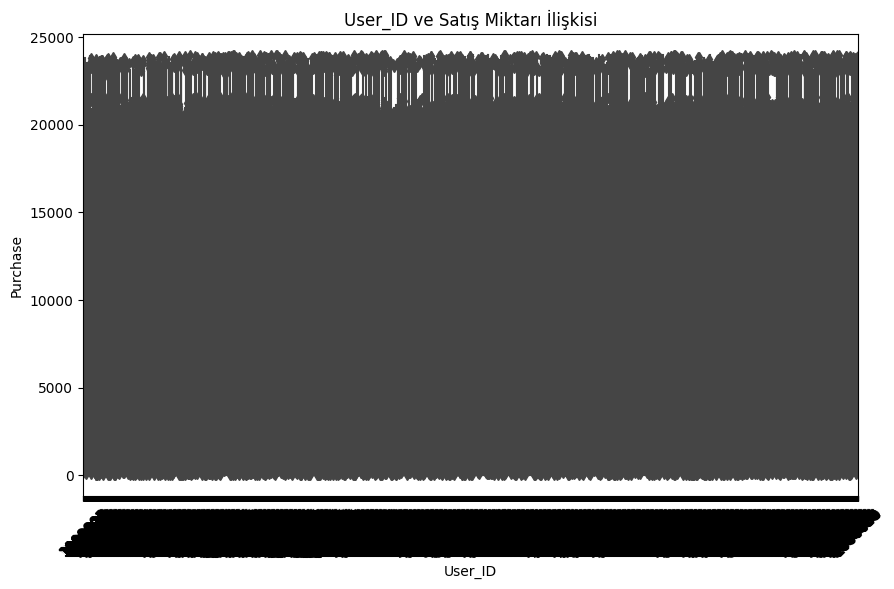

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


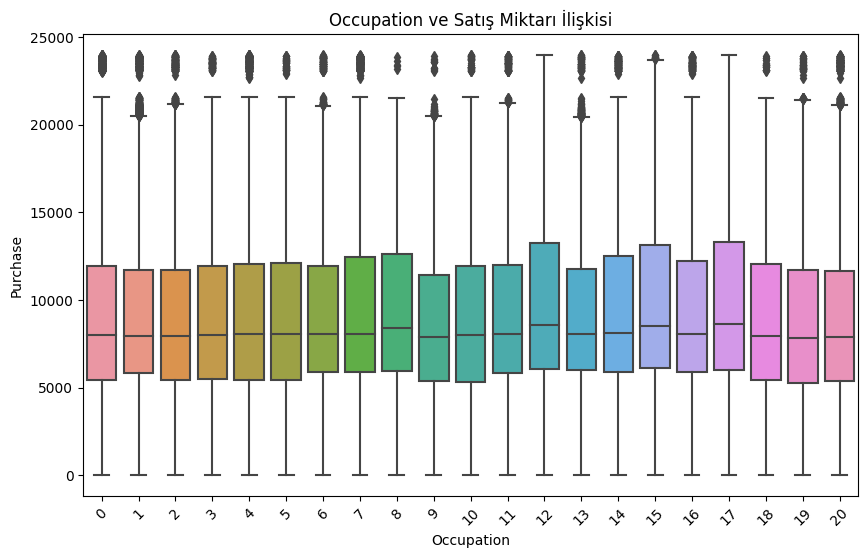

In [239]:
# Satış miktarı genellikle 'Purchase' veya benzer bir sütunla temsil edilir, bunu kullanarak uç değerleri daha iyi gözlemeyebileceğimiz bir tablodan inceleyelim.

if 'Purchase' in df.columns:
    for col in categorical_columns:
        if col != 'Purchase':  # Satış sütunu ile ilişkiyi incelemeyelim
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=col, y='Purchase', data=df)
            plt.title(f'{col} ve Satış Miktarı İlişkisi')
            plt.xticks(rotation=45)
            plt.show()

* Pivot table (özet tablo), büyük veri kümelerindeki kategorik ve sayısal verileri özetlemek, organize etmek ve analiz etmek için kullanılan güçlü bir araçtır. Veriyi farklı kategorilere, gruplara veya metriklere göre gruplar ve bunların toplam, ortalama, maksimum gibi özet istatistiklerini kolayca gösterir, özellikle satış raporları, performans değerlendirmeleri ve kategorik karşılaştırmalarda oldukça yaygındır.

/tmp/ipykernel_30/1360595564.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Purchase', index=categorical_columns[0], columns=categorical_columns[1], aggfunc='mean')


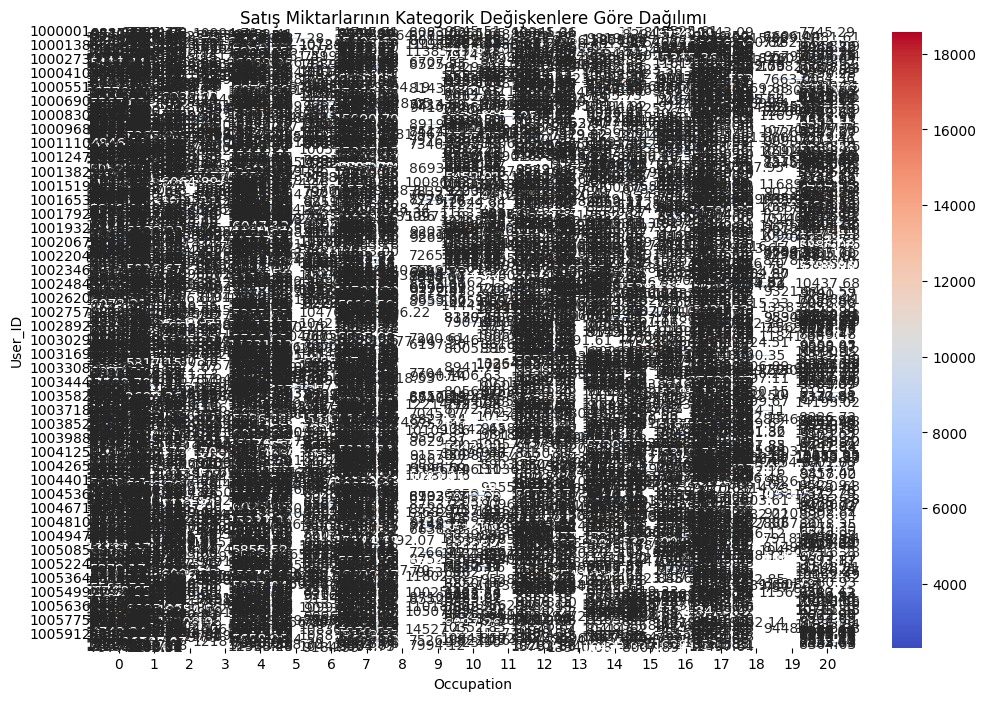

In [240]:
pivot_table = df.pivot_table(values='Purchase', index=categorical_columns[0], columns=categorical_columns[1], aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Satış Miktarlarının Kategorik Değişkenlere Göre Dağılımı')
plt.show()


1. Ürün Bazlı Analiz
En çok ortalama satış yapılan ürün: P00086242 (21,256.51)
En az ortalama satış yapılan ürün: P00370293 (36.68)
Sonuç: Ürünler arasında ciddi bir satış miktarı farkı var. Bu, ürün popülerliğinin veya fiyat farklarının etkisi olabilir. En çok satan ürünlere odaklanarak bu ürünlerin neden yüksek performans gösterdiği analiz edilebilir.

2. Cinsiyet Bazlı Analiz
Erkek müşteriler (M): 9,437.53
Kadın müşteriler (F): 8,734.57
Sonuç: Erkek müşteriler, kadınlara göre daha fazla harcama yapmış. Pazarlama kampanyalarını erkeklere hitap edecek şekilde yoğunlaştırmak veya kadın müşterilerin ilgisini artırmak için kampanyalar düzenlemek faydalı olabilir.

3. Yaş Grupları Bazlı Analiz
En yüksek ortalama satış: 51-55 yaş (9,534.81)
En düşük ortalama satış: 0-17 yaş (8,933.46)
Sonuç: Orta yaş ve üzeri gruplar (51-55 ve 55+) daha yüksek harcama yapıyor. Bu gruplar için premium ürünler veya özel kampanyalar planlanabilir. Genç gruplar (0-17, 18-25) daha az harcama yapıyor; bu yaş grubuna yönelik daha uygun fiyatlı ürünler veya cazip promosyonlar sunulabilir.

4. Şehir Kategorisi Bazlı Analiz
En yüksek ortalama satış: C kategorisi şehirler (9,719.92)
En düşük ortalama satış: A kategorisi şehirler (8,911.94)
Sonuç: Küçük şehirler (C) büyük şehirlere (A) kıyasla daha fazla harcama yapmış. Bu, küçük şehirlerdeki müşterilerin daha sadık veya belirli ürünlere daha fazla yöneldiğini gösterebilir. Büyük şehirlerde rekabetin yüksek olabileceği ve daha agresif bir pazarlama stratejisinin gerekebileceği düşünülebilir.

5. Şehirde Kalma Süresi Bazlı Analiz
En yüksek ortalama satış: 2 yıldır yaşayanlar (9,320.43)
En düşük ortalama satış: 0 yıl (yeni gelenler) (9,180.08)
Sonuç: Şehirde daha uzun süre yaşayan müşterilerle yeni gelen müşteriler arasında büyük bir fark yok, ancak yeni gelen müşterilere yönelik özel kampanyalar düzenlenerek satışlar artırılabilir.

## 3.3 Kategorik Gruplama İşlemleri


In [260]:

# Kategorik değişkenleri seçelim
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

# Kategorik değişkenler ve benzersiz değer sayıları
print("Kategorik Değişkenler ve Benzersiz Değer Sayıları:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Örnek: Her kategorik değişkene göre satın alım miktarlarının ortalaması
for col in categorical_columns:
    print(f"\nGruplama: {col}")
    print(df.groupby(col)['Purchase'].mean().sort_values(ascending=False))


Kategorik Değişkenler ve Benzersiz Değer Sayıları:
Product_ID: 3631 unique values
Age: 7 unique values
Stay_In_Current_City_Years: 5 unique values
Age_Group: 7 unique values

Gruplama: Product_ID
Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
                 ...     
P00372445      374.930705
P00375436      374.266585
P00371644      362.911012
P00370853       37.393643
P00370293       36.675159
Name: Purchase, Length: 3631, dtype: float64

Gruplama: Age
Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

Gruplama: Stay_In_Current_City_Years
Stay_In_Current_City_Years
2     9320.429810
3     9286.904119
4+    9275.598872
1     9250.145923
0     9180.075123
Name: Purchase, dtype: float64

Gruplama: Age_Group
Age_Group
Senior     9534.808031
Elderly    9336.280459
Mi

/tmp/ipykernel_30/3710993020.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


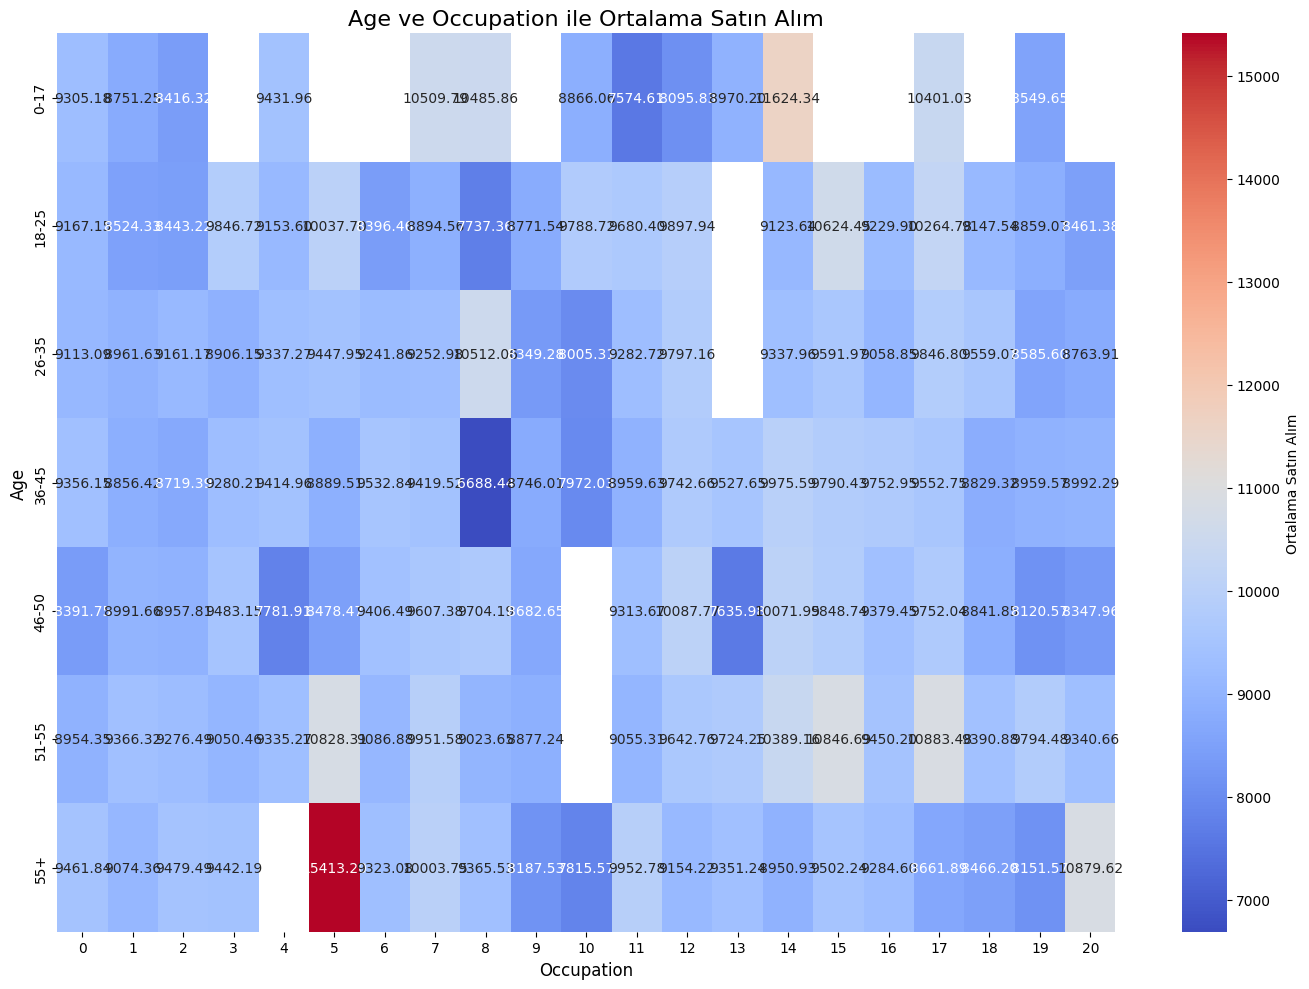

In [242]:
# Age ve Occupation ile Pivot Table ve Heatmap

# Pivot tablo oluşturma
pivot_table = df.pivot_table(
    values='Purchase', 
    index='Age', 
    columns='Occupation', 
    aggfunc='mean'
)

# Isı haritası görselleştirme
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Ortalama Satın Alım'})

# Grafik düzenlemeleri
plt.title('Age ve Occupation ile Ortalama Satın Alım', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()

plt.show()


In [243]:
# Age ve Gender değişkenlerine göre satın alım ortalamalarını gruplama
grouped_data = df.groupby(['Age', 'Gender'])['Purchase'].mean().reset_index()

# Gruplama sonuçlarını yazdırma
print(grouped_data)


      Age Gender     Purchase
0    0-17      F  8338.771985
1    0-17      M  9235.173670
2   18-25      F  8343.180201
3   18-25      M  9440.942971
4   26-35      F  8728.251754
5   26-35      M  9410.337578
6   36-45      F  8959.844056
7   36-45      M  9453.193643
8   46-50      F  8842.098947
9   46-50      M  9357.471509
10  51-55      F  9042.449666
11  51-55      M  9705.094802
12    55+      F  9007.036199
13    55+      M  9438.195603


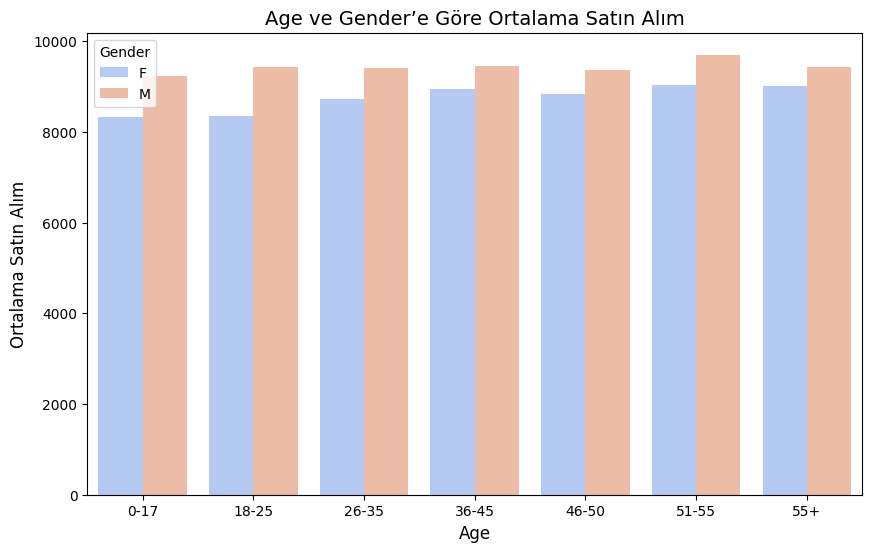

In [244]:
# Age ve Gender ile Gruplama

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=grouped_data, palette="coolwarm")

# Grafik düzenlemeleri
plt.title('Age ve Gender’e Göre Ortalama Satın Alım', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Ortalama Satın Alım', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


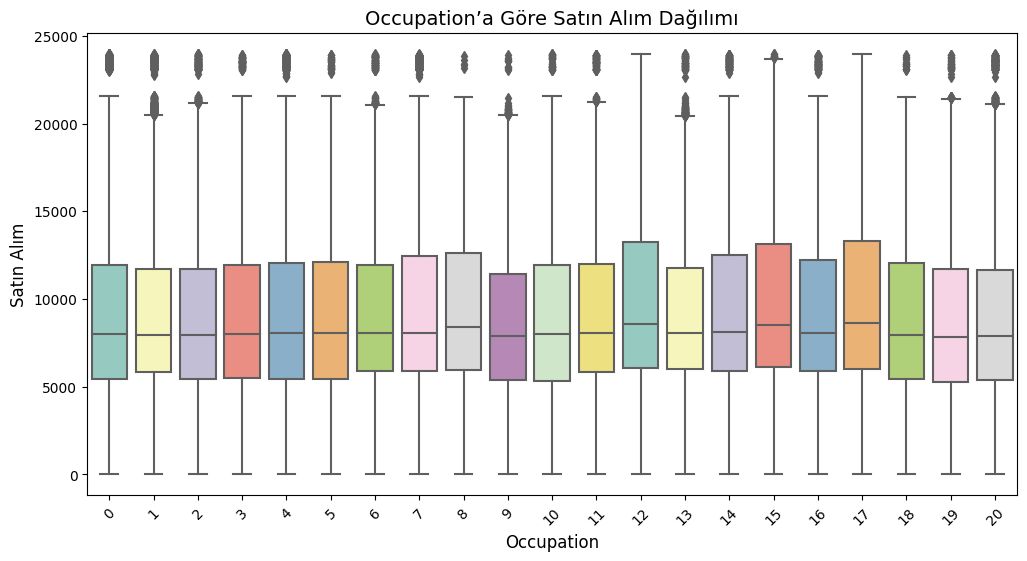

In [245]:
#Satın Alım Dağılımlarını Boxplot ile İnceleme

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Purchase', data=df, palette="Set3")

# Grafik düzenlemeleri
plt.title('Occupation’a Göre Satın Alım Dağılımı', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Satın Alım', fontsize=12)
plt.xticks(rotation=45)  # Meslekleri eğik yazdırma
plt.show()


In [246]:
# Kategorik Değişkenlerin Önemli Metriklerini Hesaplama
# Her kategorik değişken için hem satın alım ortalamalarını hem de toplam satın alımları görelim.
for col in categorical_columns:
    summary = df.groupby(col)['Purchase'].agg(['mean', 'sum', 'count']).reset_index()
    print(f"\n{col} için özet tablo:")
    print(summary)


/tmp/ipykernel_30/2898592075.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(col)['Purchase'].agg(['mean', 'sum', 'count']).reset_index()
/tmp/ipykernel_30/2898592075.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(col)['Purchase'].agg(['mean', 'sum', 'count']).reset_index()



User_ID için özet tablo:
      User_ID          mean      sum  count
0     1000001   9545.514286   334093     35
1     1000002  10525.610390   810472     77
2     1000003  11780.517241   341635     29
3     1000004  14747.714286   206468     14
4     1000005   7745.292453   821001    106
...       ...           ...      ...    ...
5886  1006036   8007.894942  4116058    514
5887  1006037   9176.540984  1119538    122
5888  1006038   7502.833333    90034     12
5889  1006039   7977.283784   590319     74
5890  1006040   9184.994444  1653299    180

[5891 rows x 4 columns]

Product_ID için özet tablo:
     Product_ID          mean       sum  count
0     P00000142  11143.642361  12837476   1152
1     P00000242  10551.851064   3967496    376
2     P00000342   5313.422131   1296475    244
3     P00000442   4795.358696    441173     92
4     P00000542   5417.530201    807212    149
...         ...           ...       ...    ...
3626   P0099442  14351.915000   2870383    200
3627   P0099642 

/tmp/ipykernel_30/1425710430.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


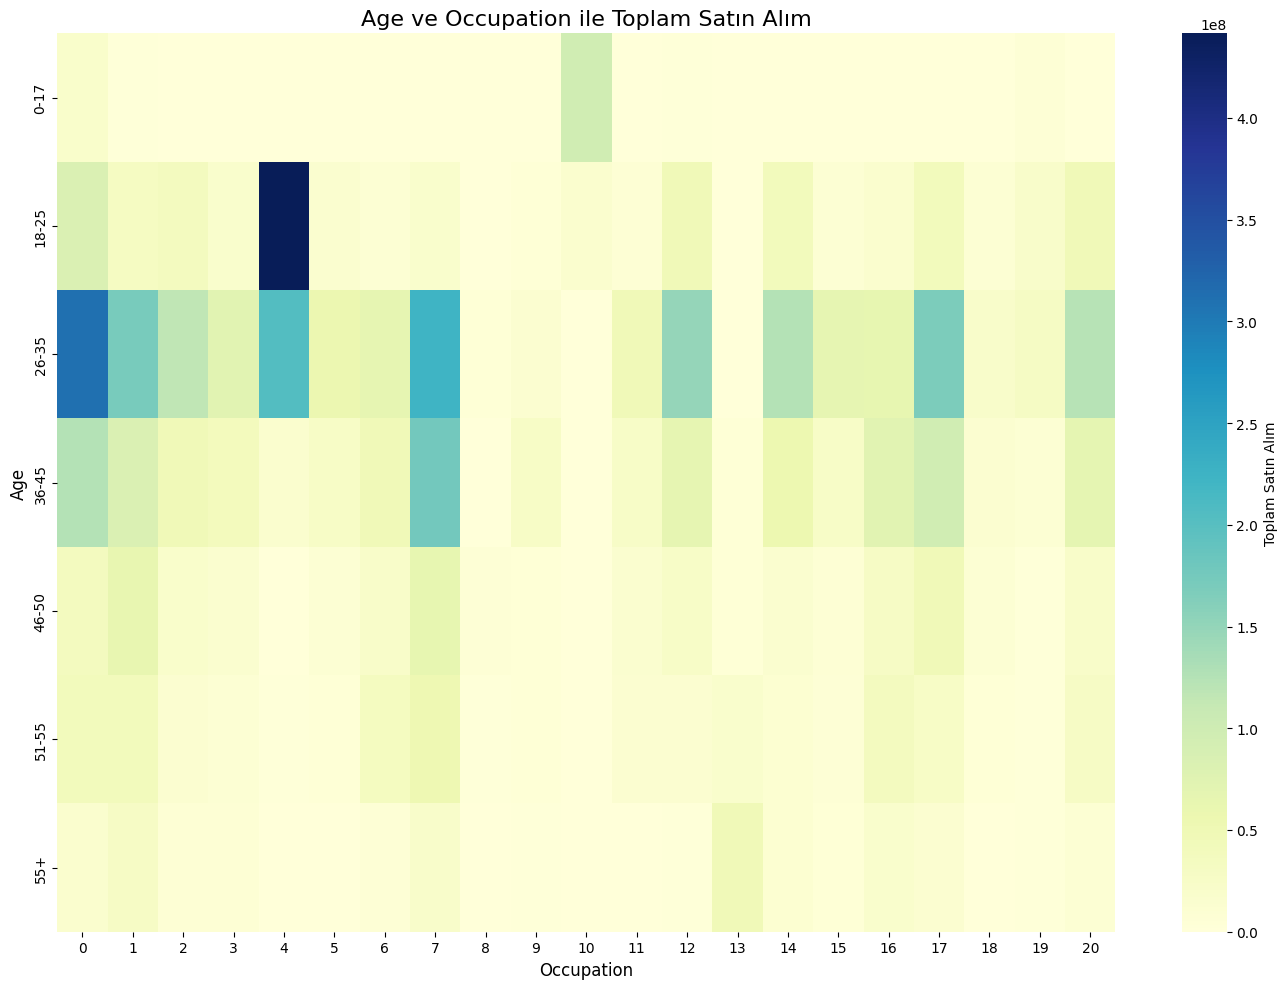

In [247]:
# Çok Değişkenli Heatmap

pivot_table = df.pivot_table(
    values='Purchase', 
    index='Age', 
    columns='Occupation', 
    aggfunc='sum'
)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Toplam Satın Alım'})

plt.title('Age ve Occupation ile Toplam Satın Alım', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


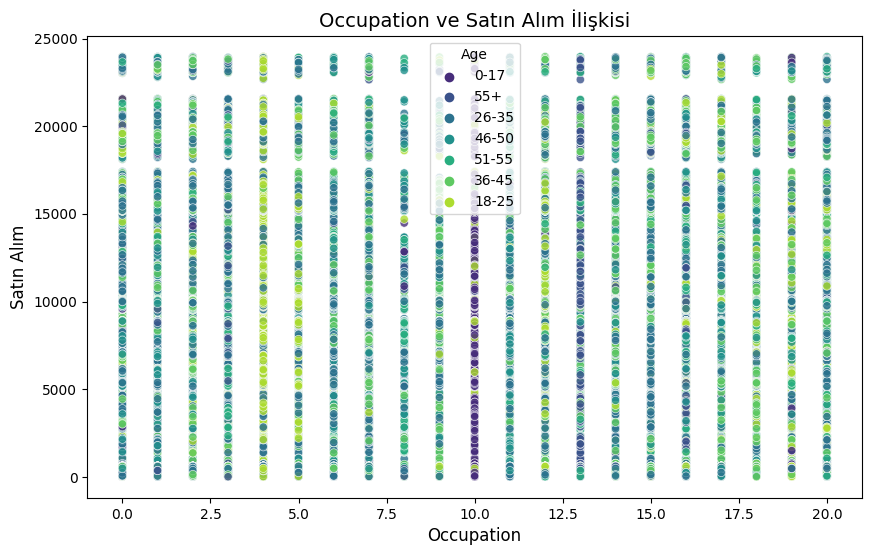

In [248]:
# Kategorik ve Sayısal Değişken İlişkisi

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Occupation', y='Purchase', hue='Age', data=df, palette="viridis", alpha=0.8)

plt.title('Occupation ve Satın Alım İlişkisi', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Satın Alım', fontsize=12)
plt.legend(title='Age', fontsize=10)
plt.show()


## 4. Sürekli Değişken Analizi


4.1 Sürekli Değişkenlerin Analizi

In [249]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,3,NaN,NaN,8370
1,0,1,6.0,14.0,15200
2,0,12,NaN,NaN,1422
3,0,12,14.0,NaN,1057
4,0,8,NaN,NaN,7969


In [250]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [251]:
# Sayısal kolonların temel istatistikleri

def numeric_summary(data, exclude_columns=None):
    """
    Sayısal kolonların temel istatistiklerini döndüren bir fonksiyon.
    
    Args:
    data (pd.DataFrame): Analiz yapılacak veri seti.
    exclude_columns (list, optional): Hariç tutulacak sütun isimleri.
    
    Returns:
    pd.DataFrame: Sayısal kolonların istatistiksel özeti.
    """
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

    if exclude_columns:
        numeric_cols = [col for col in numeric_cols if col not in exclude_columns]
    
    summary = data[numeric_cols].describe().T
    summary['median'] = data[numeric_cols].median()  # Medyanı ekle
    
    return summary

summary = numeric_summary(df, exclude_columns=["Product_Category_3"])
print(summary)


                       count         mean          std   min     25%     50%  \
Marital_Status      550068.0     0.409653     0.491770   0.0     0.0     0.0   
Product_Category_1  550068.0     5.404270     3.936211   1.0     1.0     5.0   
Product_Category_2  376430.0     9.842329     5.086590   2.0     5.0     9.0   
Purchase            550068.0  9263.968713  5023.065394  12.0  5823.0  8047.0   

                        75%      max  median  
Marital_Status          1.0      1.0     0.0  
Product_Category_1      8.0     20.0     5.0  
Product_Category_2     15.0     18.0     9.0  
Purchase            12054.0  23961.0  8047.0  


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


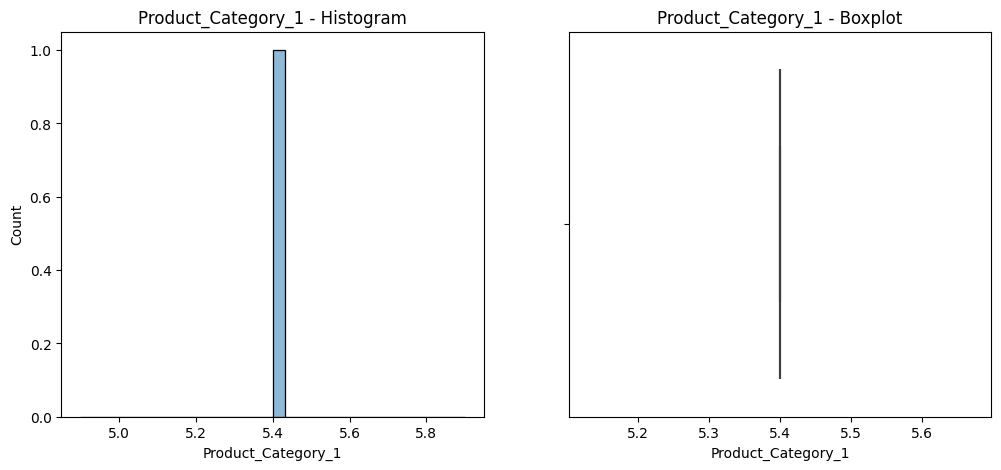

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


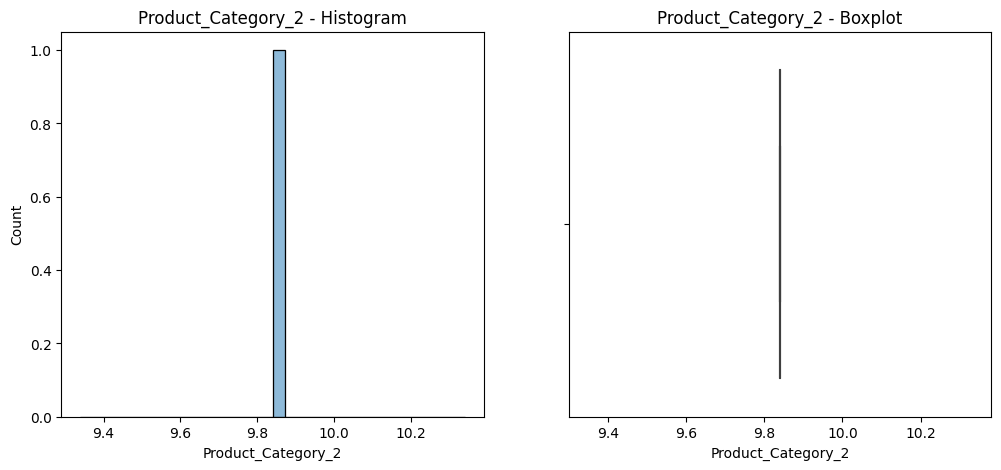

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


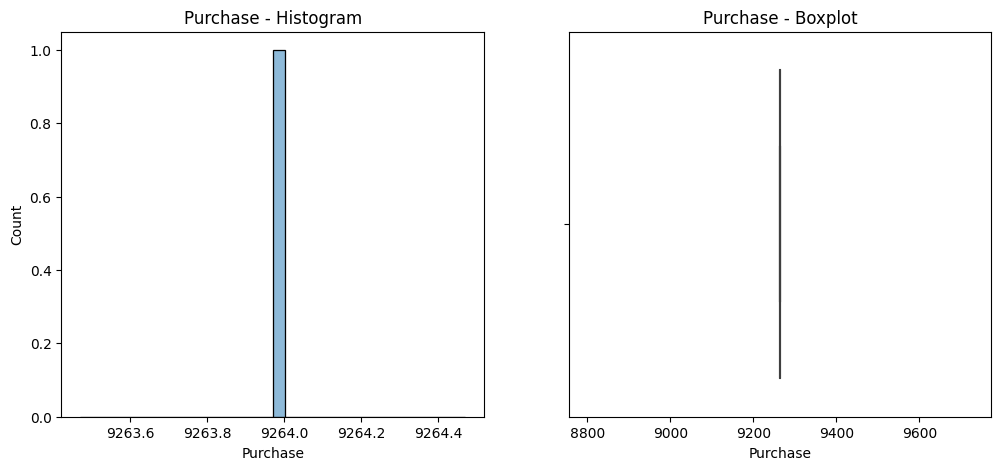

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


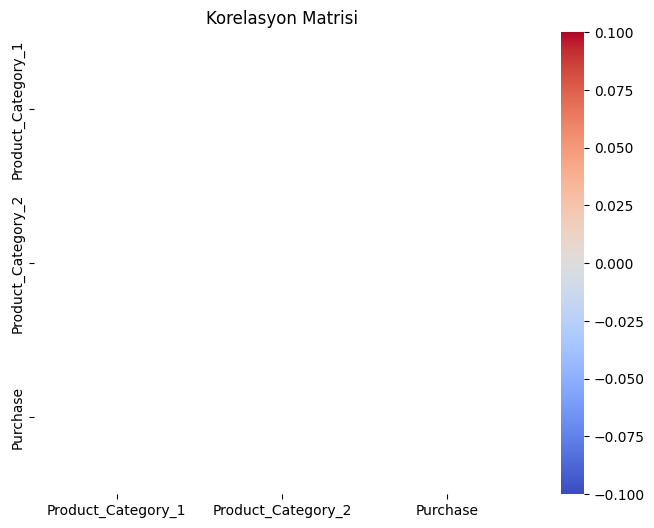

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verileri tanımlama (örnek veri için)
data = {
    "Product_Category_1": [5.40],
    "Product_Category_2": [9.84],
    "Purchase": [9263.97]
}

df = pd.DataFrame(data)

# Histogram ve Boxplot (Product_Category_3 hariç)
for col in ["Product_Category_1", "Product_Category_2", "Purchase"]:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} - Histogram")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

# Korelasyon Matrisi (Product_Category_3 hariç)
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()



## 5. Aykırı Değer Analizi 

In [253]:
import pandas as pd

# Verileri tanımlama (örnek veri için)
data = {
    "Product_Category_1": [5.40, 1.0, 15.0, 20.0, 5.0],
    "Product_Category_2": [9.84, 2.0, 18.0, 10.0, 8.0],
    "Purchase": [9263.97, 20000, 500, 15000, 8000]
}

df = pd.DataFrame(data)

# IQR Yöntemi ile Aykırı Değer Analizi
for col in ["Product_Category_1", "Product_Category_2", "Purchase"]:
    Q1 = df[col].quantile(0.25)  # 1. Çeyrek
    Q3 = df[col].quantile(0.75)  # 3. Çeyrek
    IQR = Q3 - Q1  # IQR Hesapla
    
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır
    
    # Aykırı değerleri tespit et
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n*** {col} ***")
    print(f"Alt sınır: {lower_bound}")
    print(f"Üst sınır: {upper_bound}")
    print(f"Aykırı Değerler:\n{outliers[col].values}")


*** Product_Category_1 ***
Alt sınır: -10.0
Üst sınır: 30.0
Aykırı Değerler:
[]

*** Product_Category_2 ***
Alt sınır: 5.0
Üst sınır: 13.0
Aykırı Değerler:
[ 2. 18.]

*** Purchase ***
Alt sınır: -2500.0
Üst sınır: 25500.0
Aykırı Değerler:
[]



*** Product_Category_1 ***
Alt sınır: -10.0
Üst sınır: 30.0
Aykırı Değerler:
[]


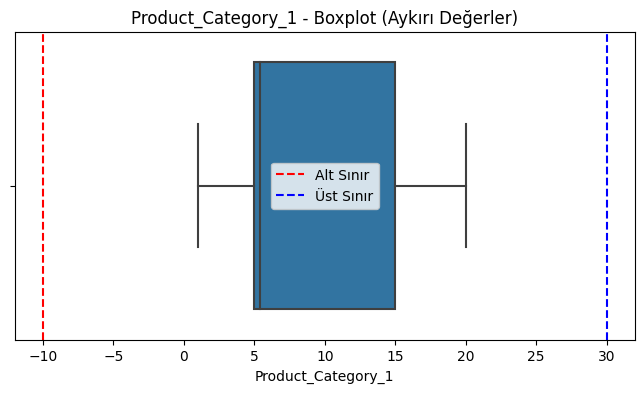


*** Product_Category_2 ***
Alt sınır: 5.0
Üst sınır: 13.0
Aykırı Değerler:
[ 2. 18.]


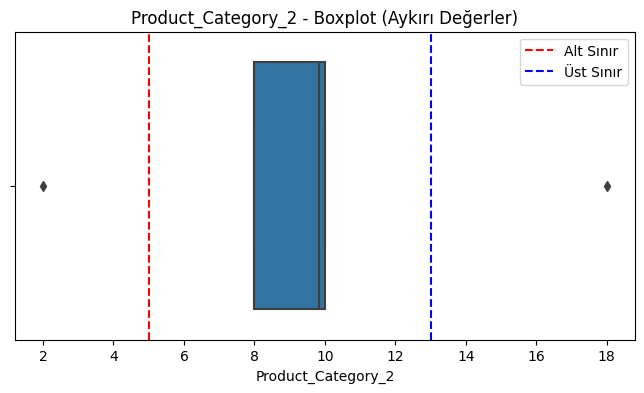


*** Purchase ***
Alt sınır: -2500.0
Üst sınır: 25500.0
Aykırı Değerler:
[]


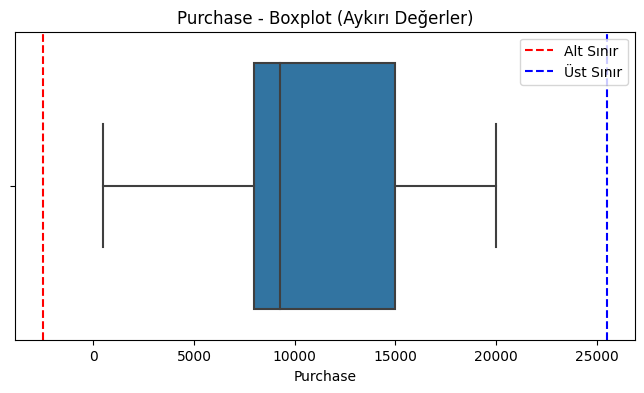

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verileri tanımlama (örnek veri için)
data = {
    "Product_Category_1": [5.40, 1.0, 15.0, 20.0, 5.0],
    "Product_Category_2": [9.84, 2.0, 18.0, 10.0, 8.0],
    "Purchase": [9263.97, 20000, 500, 15000, 8000]
}

df = pd.DataFrame(data)

# IQR Yöntemi ile Aykırı Değer Analizi ve Görselleştirme
for col in ["Product_Category_1", "Product_Category_2", "Purchase"]:
    Q1 = df[col].quantile(0.25)  # 1. Çeyrek
    Q3 = df[col].quantile(0.75)  # 3. Çeyrek
    IQR = Q3 - Q1  # IQR Hesapla
    
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır
    
    # Aykırı değerleri tespit et
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\n*** {col} ***")
    print(f"Alt sınır: {lower_bound}")
    print(f"Üst sınır: {upper_bound}")
    print(f"Aykırı Değerler:\n{outliers[col].values}")
    
    # Boxplot ile Görselleştirme
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.axvline(lower_bound, color='red', linestyle='--', label='Alt Sınır')  # Alt sınır çizgisi
    plt.axvline(upper_bound, color='blue', linestyle='--', label='Üst Sınır')  # Üst sınır çizgisi
    plt.title(f"{col} - Boxplot (Aykırı Değerler)")
    plt.legend()
    plt.show()


## 6. Feature Engineering


Bu örnekler, veri setinizdeki özellikleri zenginleştirerek daha güçlü analizler veya modellemeler yapmamızı sağlar.

In [278]:

from sklearn.preprocessing import MinMaxScaler

# Veriyi Yükleme
file_path = "/kaggle/input/black-friday-sale/train.csv"  # Veri setinin yolu
df = pd.read_csv(file_path)

# Eksik Değerlerin Yönetimi
df["Product_Category_2"] = df["Product_Category_2"].fillna(-1)  # Eksik değerleri -1 ile doldur
df["Product_Category_3"] = df["Product_Category_3"].fillna(-1)

# Yeni Özellikler Oluşturma
df["Total_Product_Score"] = (
    df["Product_Category_1"] + df["Product_Category_2"] + df["Product_Category_3"]
)

# Alışveriş Tipi Özelliği
df["High_Spending"] = df["Purchase"].apply(lambda x: 1 if x > 15000 else 0)  # Büyük harcamaları işaretle

# Kategorik Özelliklerin Encoding İşlemi
df = pd.get_dummies(df, columns=["Gender", "City_Category"], drop_first=True)

# Ölçekleme (Scaling)
scaler = MinMaxScaler()
df["Purchase_Scaled"] = scaler.fit_transform(df[["Purchase"]])

# Müşteri Segmentasyonu (Yaş Grupları)
df["Age_Group"] = df["Age"].replace(
    {
        "0-17": "Child",
        "18-25": "Youth",
        "26-35": "Adult",
        "36-45": "Mid_Age",
        "46-50": "Older",
        "51-55": "Senior",
        "55+": "Elderly",
    }
)

# Sonuçların Kontrolü
print(df.head())


   User_ID Product_ID   Age  Occupation Stay_In_Current_City_Years  \
0  1000001  P00069042  0-17          10                          2   
1  1000001  P00248942  0-17          10                          2   
2  1000001  P00087842  0-17          10                          2   
3  1000001  P00085442  0-17          10                          2   
4  1000002  P00285442   55+          16                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                -1.0                -1.0   
1               0                   1                 6.0                14.0   
2               0                  12                -1.0                -1.0   
3               0                  12                14.0                -1.0   
4               0                   8                -1.0                -1.0   

   Purchase  Total_Product_Score  High_Spending  Gender_M  City_Category_B  \
0      8370   

In [261]:
# Kategoriler Arasındaki Harcama Dağılımı
# Bir müşterinin toplam harcamasının hangi ürün kategorisine daha fazla yöneldiğini göstermek için yeni oran özellikleri oluşturalım.
# Product_Category_1 Harcama Oranı
df["Category_1_Ratio"] = df["Product_Category_1"] / df["Total_Product_Score"]

# Product_Category_2 Harcama Oranı
df["Category_2_Ratio"] = df["Product_Category_2"] / df["Total_Product_Score"]

# Product_Category_3 Harcama Oranı
df["Category_3_Ratio"] = df["Product_Category_3"] / df["Total_Product_Score"]

# Örnek Kontrol
print(df[["Category_1_Ratio", "Category_2_Ratio", "Category_3_Ratio"]].head())


   Category_1_Ratio  Category_2_Ratio  Category_3_Ratio
0          3.000000         -1.000000         -1.000000
1          0.047619          0.285714          0.666667
2          1.200000         -0.100000         -0.100000
3          0.480000          0.560000         -0.040000
4          1.333333         -0.166667         -0.166667


In [264]:
# Ürün Kategorileri Üzerinden Yoğunluk
#  Bir müşterinin toplam ürün alışveriş sıklığını analiz etmek için yeni özellikler oluşturabiliriz.
df["Total_Category_Count"] = (
    (df["Product_Category_1"] > 0).astype(int) +
    (df["Product_Category_2"] > 0).astype(int) +
    (df["Product_Category_3"] > 0).astype(int)
)

# Örnek Kontrol
print(df[["Total_Category_Count"]].head())



   Total_Category_Count
0                     1
1                     3
2                     1
3                     2
4                     1


In [267]:
# Harcamayı Düşük, Orta ve Yüksek Gruplara Ayırma
def spending_group(purchase):
    if purchase < 5000:
        return "Low"
    elif 5000 <= purchase < 15000:
        return "Medium"
    else:
        return "High"

df["Spending_Group"] = df["Purchase"].apply(spending_group)

# Örnek Kontrol
print(df["Spending_Group"].value_counts())


Spending_Group
Medium    344622
High      110523
Low        94923
Name: count, dtype: int64


In [270]:
# Satın Alma Puanına Göre Sadakat
# Bir müşterinin toplam satın alma puanını, kategori sayılarına oranlayarak sadakat puanı oluşturabiliriz.

df["Loyalty_Score"] = df["Purchase"] / df["Total_Category_Count"]

# Eksik değerleri doldur
df["Loyalty_Score"].fillna(0, inplace=True)

# Örnek Kontrol
print(df[["Loyalty_Score"]].head())



   Loyalty_Score
0    8370.000000
1    5066.666667
2    1422.000000
3     528.500000
4    7969.000000


/tmp/ipykernel_30/2902211044.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loyalty_Score"].fillna(0, inplace=True)


In [276]:
#  Harcamaların Logaritmik Dönüşümü
# Harcama değerlerini logaritmik dönüşüm ile daha düzgün bir dağılıma dönüştürebilriz.

import numpy as np

df["Log_Purchase"] = np.log1p(df["Purchase"])

# Örnek Kontrol
print(df[["Purchase", "Log_Purchase"]].head())




   Purchase  Log_Purchase
0      8370      9.032529
1     15200      9.629116
2      1422      7.260523
3      1057      6.964136
4      7969      8.983440


In [277]:
# Cinsiyet ve Harcama Etkileşimi
# Cinsiyet ve harcamayı birleştirerek yeni bir özellik oluşturabiliriz.

df["Gender_Purchase_Interaction"] = df["Gender_M"] * df["Purchase"]

# Örnek Kontrol
print(df[["Gender_M", "Purchase", "Gender_Purchase_Interaction"]].head())


   Gender_M  Purchase  Gender_Purchase_Interaction
0     False      8370                            0
1     False     15200                            0
2     False      1422                            0
3     False      1057                            0
4      True      7969                         7969


*Genel Öneriler*


1.	Ürün Stratejisi: Çok satan ürünlere odaklanarak stok yönetimi ve tanıtım çalışmaları optimize edilebilir. Az satan ürünler için müşteri ihtiyaçları ve ürün özellikleri analiz edilmelir.
.

2.	Müşteri Segmentasyonu: Yaş, cinsiyet ve şehir kategorisi gibi faktörlere göre müşteri gruplarına hitap eden özelleştirilmiş kampanyalar tasarlanabilir.

3.	Şehir Bazlı Pazarlama: Küçük şehirlerdeki müşterilere yönelik kampanyalar artırılarak bu yüksek satış trendi sürdürülebilir.

4.	Sadakat Programları: Uzun süre aynı şehirde yaşayan müşterilere özel avantajlar sunularak müşteri sadakati artırılabilir.